# 1] Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2] Import Datasets

In [2]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# 3] Data Understanding

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Inference

1)The shape of the data set is (30,2)

2)There is no null value and data types are assigned correctly

3)There is no need to do data cleaning process

# 4] Assumptions Check

## Linearity Check

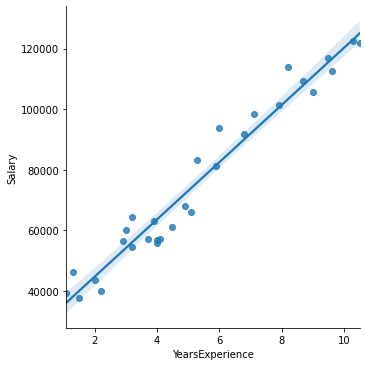

In [9]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)

## Normality Check

<AxesSubplot:xlabel='Salary', ylabel='Density'>

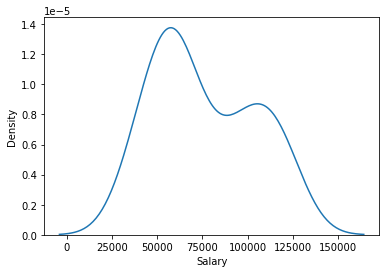

In [10]:
sns.distplot(a=salary_data['Salary'],hist=False)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

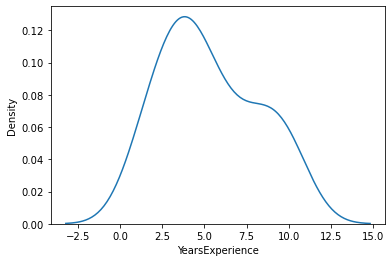

In [26]:
sns.distplot(a=salary_data['YearsExperience'],hist=False)

In [11]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Inference

1)From the above plots its is clear that the input and output data are almost linear and positively correlated.

2)From the correlation table, it is clear that the strength of correlation is good.

3)since, there is only one input,multicollinearity doesn't occur.

Hence we can use built linear regression model

# 5] Model Building

In [12]:
import statsmodels.formula.api as smf

In [17]:
x=salary_data[['YearsExperience']]
y=salary_data[['Salary']]

In [20]:
linear_model=smf.ols(formula='y ~ x',data=salary_data).fit()

In [21]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

# Inference
1)The value of slope is 1.649

2)The value of intercept is 6.5827

# 6] Model Evaluation

In [24]:
y_pred=linear_model.predict(x)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error is  :',mean_squared_error(y,y_pred))
print('R2 score is            :',r2_score(y,y_pred))

Mean Squared Error is  : 31270951.722280968
R2 score is            : 0.9569566641435086


# Inference

Since, the r2 score is close to 1, the model will comparitively perform well.